<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Магазин-одежды" data-toc-modified-id="Магазин-одежды-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Магазин одежды</a></span></li><li><span><a href="#Marketplace" data-toc-modified-id="Marketplace-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Marketplace</a></span></li><li><span><a href="#Магазин-подарков" data-toc-modified-id="Магазин-подарков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Магазин подарков</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных.</a></span></li></ul></div>

In [1]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats as st

#from statsmodels.tsa.stattools import adfuller

#from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Данные
Предоставлены данные о покупках из трёх разных интернет магазинов: магазин одежы, магазин подарков, маркетплейс. Необходимо предсказать, кто из клиентов сделает покупку в ближайшие 30 дней.

In [3]:
# Загрузка файла с данными
apparel_purchases = pd.read_csv('apparel-purchases.csv', parse_dates=['date'])# магазин одежды
gifts_purchases = pd.read_csv('gifts-purchases.csv', parse_dates=['date'])# магазин подарков
marketplace_purchases = pd.read_csv('marketplace-purchases.csv', parse_dates=['created_at'])# маркетплейс

In [4]:
apparel_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message


In [5]:
apparel_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133104 entries, 0 to 133103
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       133104 non-null  int64         
 1   quantity        133104 non-null  int64         
 2   price           133104 non-null  float64       
 3   date            133104 non-null  datetime64[ns]
 4   message_id      133104 non-null  object        
 5   recommended_by  133104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.1+ MB


In [6]:
gifts_purchases.head()

,client_id,quantity,price,date,message_id,recommended_by
0,1515915625803894158,1,8943.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
1,1515915625803894158,1,46369.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
2,1515915625803894158,1,4666.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
3,1515915625803894158,1,11963.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
4,1515915625803894158,1,13107.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message


In [7]:
gifts_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       811 non-null    int64         
 1   quantity        811 non-null    int64         
 2   price           811 non-null    float64       
 3   date            811 non-null    datetime64[ns]
 4   message_id      811 non-null    object        
 5   recommended_by  811 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 38.1+ KB


In [8]:
marketplace_purchases.head()

,client_id,quantity,price,message_id,created_at,date
0,1515915625440944408,1,6298.0,1515915625440944408-1752-6450b79616277,2023-05-02,2023-05-02 08:49:57
1,1515915625440992498,1,7318.0,1515915625440992498-1818-646b35d089c98,2023-05-22,2023-05-22 13:52:13
2,1515915625441026424,1,65798.0,1515915625441026424-1802-64634e24a2cb9,2023-05-17,2023-05-17 11:21:04
3,1515915625441118180,1,5598.0,1515915625441118180-1820-646c9444ebf39,2023-05-23,2023-05-23 19:02:53
4,1515915625441124500,1,77998.0,1515915625441124500-1825-646ed5cf4d5ed,2023-05-25,2023-05-25 07:46:52


In [9]:
marketplace_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48182 entries, 0 to 48181
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   48182 non-null  int64         
 1   quantity    48182 non-null  int64         
 2   price       48182 non-null  float64       
 3   message_id  48182 non-null  object        
 4   created_at  48182 non-null  datetime64[ns]
 5   date        48182 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2+ MB


Пропусков в данных нет. Во всех данных содержатся столбцы:
- client_id - индивидуальный номер клиента;
- quantity - количество товара;
- price - цена товара;
- date - дата (+время) покупки

Так же встречаются столбцы:
- message_id - ID отправленного сообщения
- created_at - дата создания заказа
- recommended_by - рекоммендация


🔸изучить предоставленные данные 🔸создать полезные признаки для обучения модели 🔸создать целевой признак 🔸предложить и обосновать метрику 🔸обучить модель 🔸протестировать и проверить

## Анализ данных

Напишем функцию для визуализации функция количества и объема продаж, а так же числа покупателей

In [11]:
def plot_sales_statistics(data):
    # Преобразование столбца 'date' в тип datetime
    data['date'] = pd.to_datetime(data['date'])

    # Извлечение месяца из столбца 'date'
    data['month'] = data['date'].dt.to_period('M')
    
    # Группировка данных по дате и подсчёт количества проданного товара
    quantity_goods_per_day = data.groupby('date')['quantity'].sum().reset_index(name='quantity')

    # Группировка данных по месяцам и подсчет числа продаж
    sales_per_month = data.groupby('month').size().reset_index(name='count')

    # Группировка данных по месяцам и вычисление суммы цен продаж
    total_sales_per_month = data.groupby('month')['price'].sum().reset_index(name='total_price')
    
    plt.style.use('default')
    plt.rcParams.update({"grid.linewidth":0.3, "grid.alpha":0.5})
    # Создание общего рисунка и подграфиков
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))
    
    # Построим график распределения количества проданного товаа от даты
    sns.lineplot(x = 'date', y = 'quantity', data = quantity_goods_per_day, color='blue', ax=ax1)
    ax1.set(xlabel='Дата', ylabel='Количество товара', title='Продажи в магазине')
    ax1.grid()

    # Построение графика числа продаж по месяцам
    sns.barplot(x='month', y='count', data=sales_per_month, color='skyblue', ax=ax2)
    ax2.set_title('Количество  продаж за месяц')
    ax2.set_xticklabels(sales_per_month['month'], rotation=45)
    ax2.set_xlabel('Месяц')
    ax2.set_ylabel('Количество продаж')

    # Построение графика суммарной стоимости продаж по месяцам
    sns.barplot(x='month', y='total_price', data=total_sales_per_month, color='salmon', ax=ax3)
    ax3.set_title('Ежемесячный объем продаж')
    ax3.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax3.set_xlabel('Месяц')
    ax3.set_ylabel('Сумма продаж за месяц')
    
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.to_period('M')

    # Найдем новых клиентов для каждого месяца
    first_purchase_per_customer = data.groupby('client_id')['month'].min().reset_index()
    new_customers_per_month = first_purchase_per_customer.groupby('month').size().reset_index(name='new_customers')
    #new_customers_per_month = data.drop_duplicates('client_id').groupby('month').size().reset_index(name='new_customers')

    # Найдем общее количество клиентов для каждого месяца
    total_customers_per_month = data.groupby('month')['client_id'].nunique().reset_index(name='total_customers')

    # Объединим данные по новым и общим клиентам
    customers_data = pd.merge(total_customers_per_month, new_customers_per_month, on='month')
    
   

    sns.set_color_codes("pastel")
    sns.barplot(x='month', y='new_customers', data=customers_data, label='Новые покупатели', color='r', alpha=0.7, ax=ax4)
    
    sns.set_color_codes("muted")
    sns.barplot(x='month', y='total_customers', data=customers_data, label='Всего покупателей', color='b', alpha=0.5, ax=ax4)

    
    ax4.set_title('Уникальные покупатели и новые покупатели')
    ax4.set_xticklabels(total_sales_per_month['month'], rotation=45)
    ax4.set_xlabel('Месяц')
    ax4.set_ylabel('Количество покупателей')
    ax4.legend(loc='upper left', frameon=False)


    plt.tight_layout()
    plt.subplots_adjust(wspace=1)  # Увеличиваем расстояние между подграфиками
    plt.show()

Напишем функцию построения графиков зависимости количества и суммы продаж по длям недели

In [12]:
def plot_sales_weekdays(data):
    # Добавление столбца с днем недели (0 - понедельник, 1 - вторник, и так далее)
    data['day_of_week'] = data['date'].dt.dayofweek
#     # Добавление столбца с днем недели (0 - понедельник, 1 - вторник, и так далее)
#     data['day_of_week'] = data['date'].dt.dayofweek
    # Группировка данных по дню недели
    day_of_week_data = data.groupby('day_of_week').agg({
        'quantity': 'sum',
        'price': 'sum',
      #  'orders_per_week': 'sum' 
    }).reset_index()

# Маппинг для преобразования числовых значений дня недели в текстовый формат
    day_mapping = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
    day_of_week_data['day_of_week'] = day_of_week_data['day_of_week'].map(day_mapping)
    
    
    plt.style.use('default')
    plt.rcParams.update({"grid.linewidth":0.3, "grid.alpha":0.5})
    # Создание общего рисунка и подграфиков
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
    
    sns.barplot(x='day_of_week', y='quantity', data=day_of_week_data, palette='viridis', ax=ax1)
    ax1.set_title('Изменение Количества Товара в Заказах по Дням Недели')
    ax1.set_xlabel('День Недели')
    ax1.set_ylabel('Общее Количество товара в Заказах')
    
    sns.barplot(x='day_of_week', y='price', data=day_of_week_data, palette='viridis',ax=ax2)
    ax2.set_title('Изменение Суммы Заказов по Дням Недели')
    ax2.set_xlabel('День Недели')
    ax2.set_ylabel('Общая Сумма Заказов')
 
    plt.show()  

### Магазин одежды

In [13]:
print(apparel_purchases.shape)
print('Дата первой покупки:', min(apparel_purchases['date']))
print('Дата последней покупки:', max(apparel_purchases['date']))
apparel_purchases.head(5)

(133104, 6)
Дата первой покупки: 2022-10-26 00:00:00
Дата последней покупки: 2023-10-26 00:00:00


,client_id,quantity,price,date,message_id,recommended_by
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message


Данные предоставлены за год.

In [14]:
# количество уникальных клиентов
print('Количество уникальных клиентов:', apparel_purchases['client_id'].nunique())

Количество уникальных клиентов: 28891


In [15]:
# количество товаров
apparel_purchases['quantity'].unique()

array([ 1,  2,  3,  6,  4, 20, 15,  5, 30, 18,  9,  8])

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(apparel_purchases['quantity'], apparel_purchases['price'],\
            edgecolors="black")
ax.set(xlabel='Количество единиц товара', ylabel='цена',
       title='Диаграмма рассеивания количества товаров и цены')
ax.grid()
plt.show
None

Все дорогие покупки единичные.

In [ ]:

# # Проведем тест Дики-Фуллера на стационарность
# result = adfuller(df['quantity'])

# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# None

In [ ]:
#На выходе мы получим статистику теста Дики-Фуллера и p-значение. Если p-значение меньше уровня значимости (обычно 0.05), то мы можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным.

**Проанализируем как меняется покупательское поведение в зависимости от даты.**

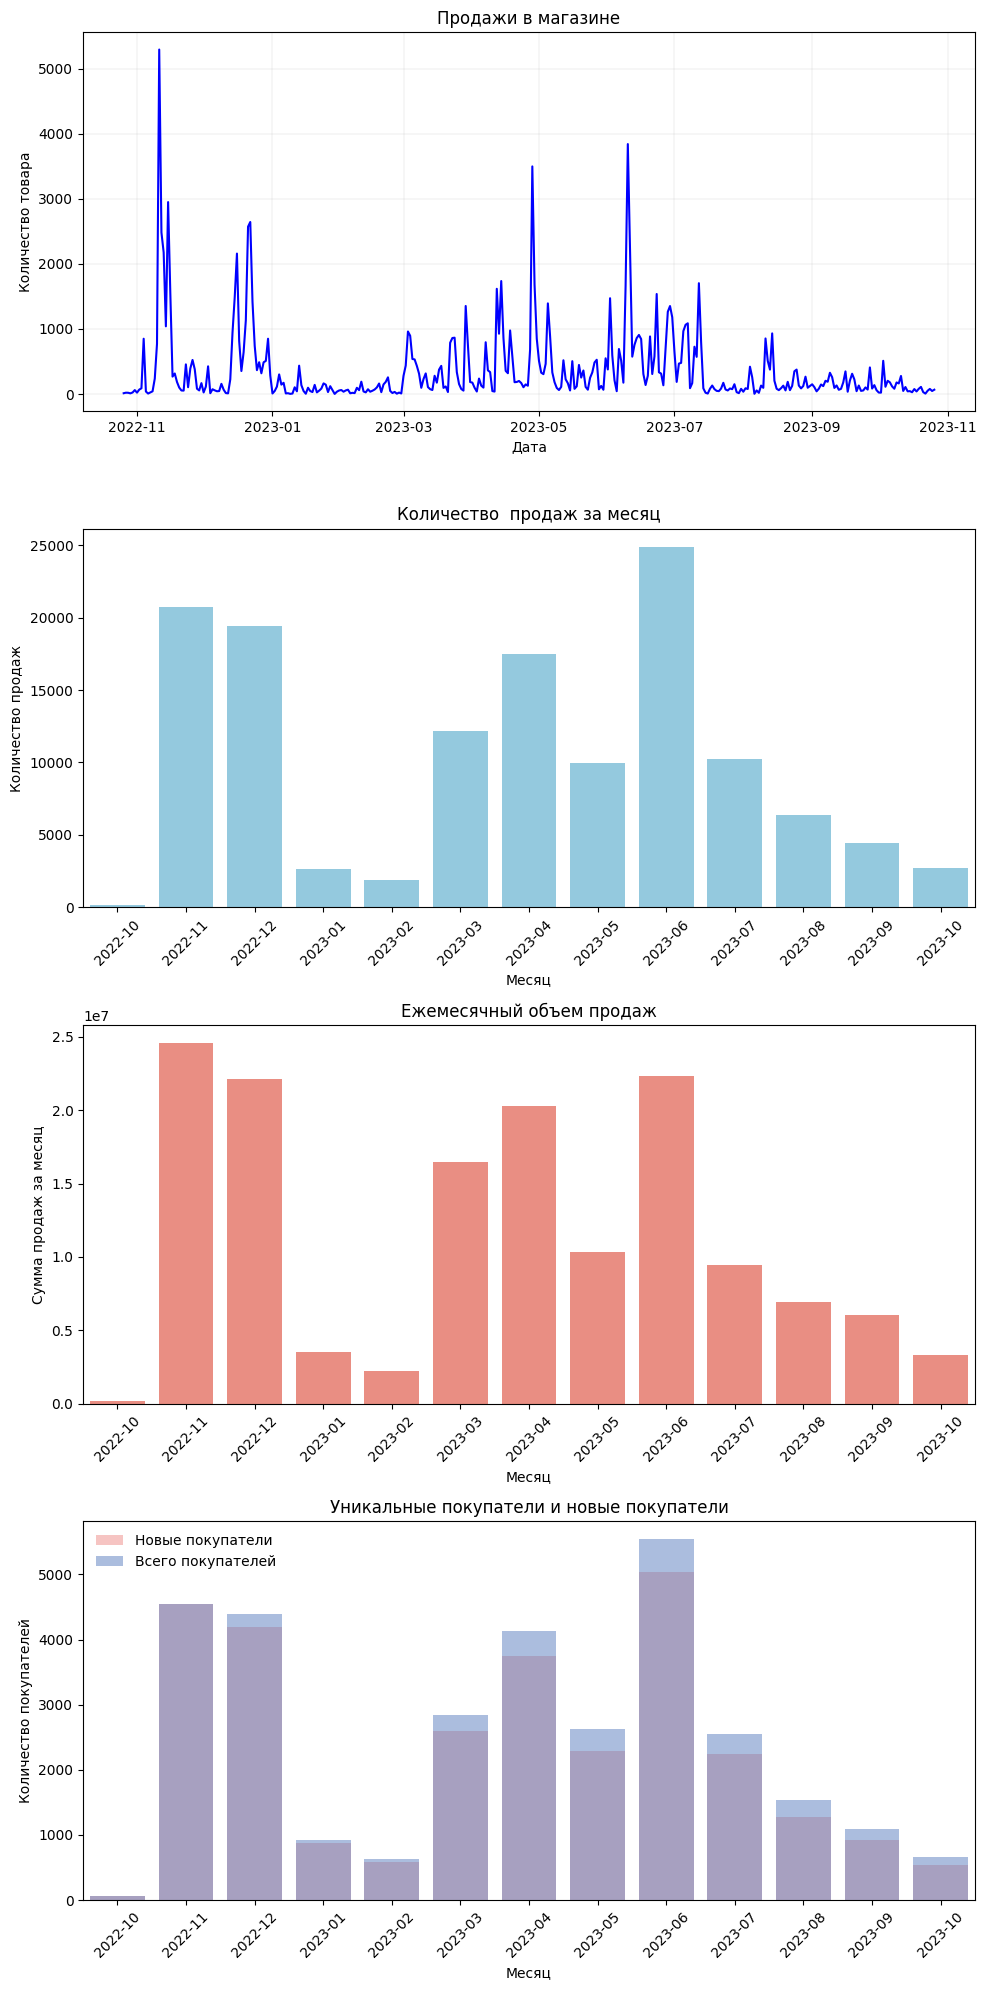

In [30]:
plot_sales_statistics(apparel_purchases)

Явно наблюдаются всплески в активности покупателей: ноябрь, декабрь, апрель, июнь.
Количество новых покупателей в магазине гораздо больше, чем сделавших повторные покупки. 


Это может указывать на необходимость усиления усилий по удержанию клиентов и повышению лояльности среди тех, кто уже совершил покупки. Работа с программами лояльности, персонализированными предложениями или скидками для постоянных клиентов может быть эффективным способом увеличить долю постоянных клиентов в общей клиентской базе. Также стоит дополнительно изучить причины, по которым новые клиенты не становятся постоянными, чтобы оптимизировать маркетинговые стратегии и улучшить клиентский опыт.

**Проанализировать как меняется покупательское поведение в разные дни недели и в выходные.** Это может помочь определить оптимальные дни для проведения маркетинговых акций.

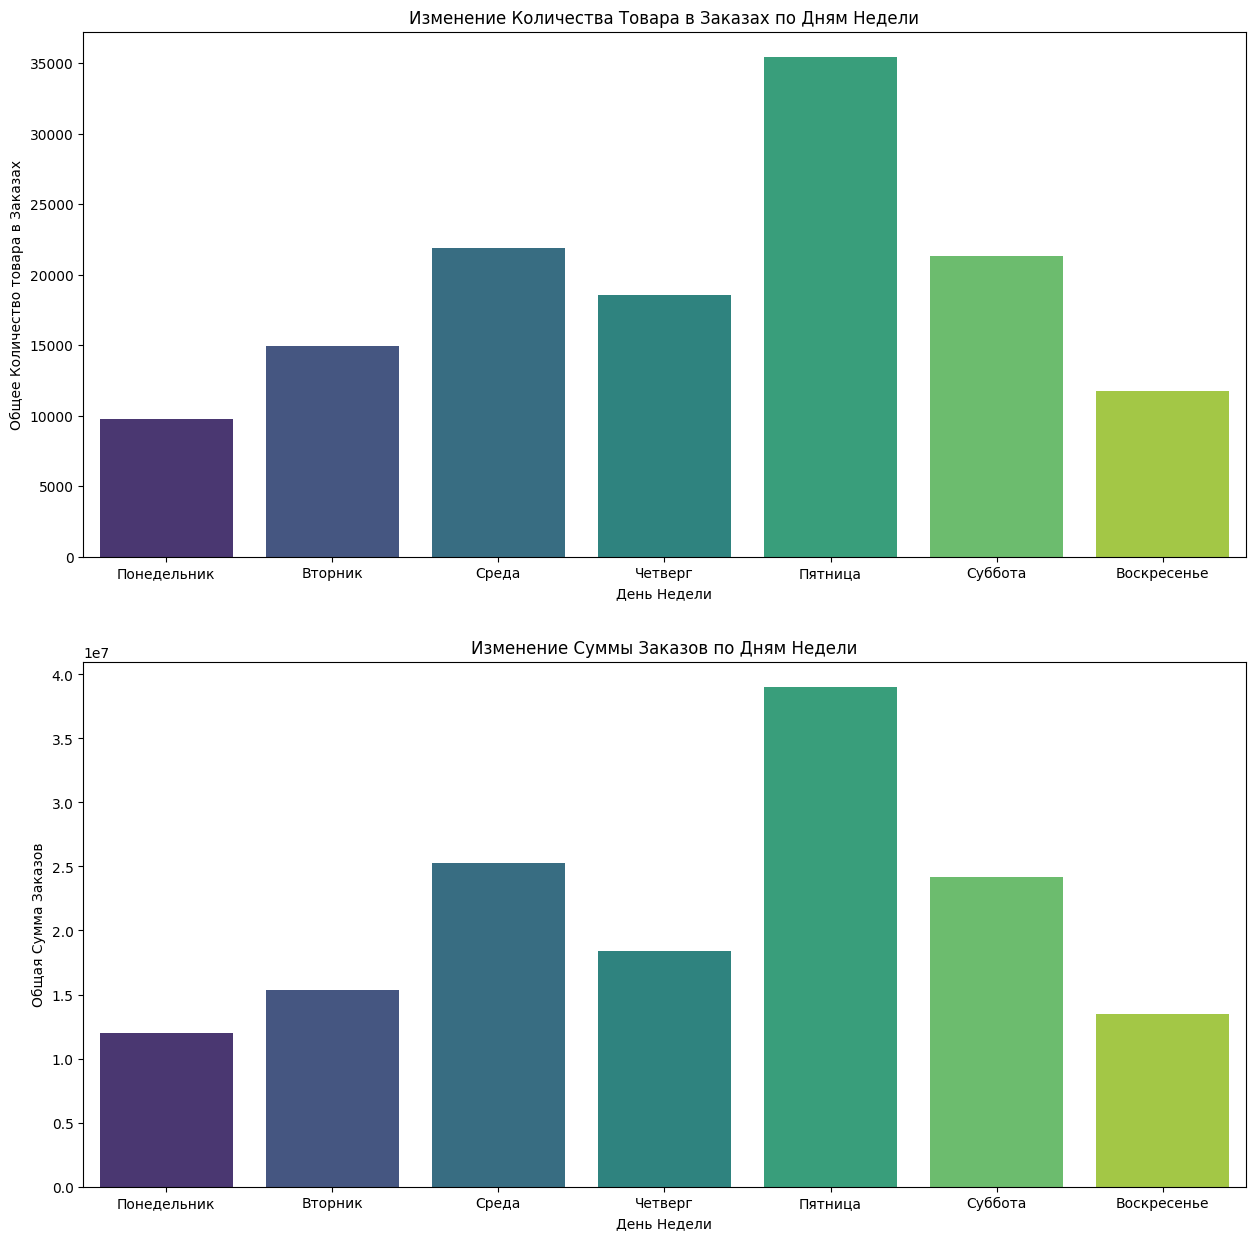

In [18]:
plot_sales_weekdays(apparel_purchases)

Анализ распределения количества товаров и распределения сумм заказов по дням недели выявил следующие тренды:

- Пятница является лидером по количеству товаров в заказах.
- Среда и суббота демонстрируют схожие показатели.
- Четверг следует за средой и субботой.
- Вторник и воскресенье имеют более умеренные значения.
- Понедельник демонстрирует наименьшее количество товаров в заказах.

Эти данные могут подсказывать о паттернах в покупательском поведении, что может быть полезно для определения оптимальных дней для проведения маркетинговых акций. Например, пятница, с ее высоким показателем, может быть привлекательным днем для акций или специальных предложений, в то время как в понедельник можно сосредоточить усилия на стимулировании покупок.

### Marketplace

In [19]:
print(marketplace_purchases.shape)
print('Дата первой покупки:', min(marketplace_purchases['date']))
print('Дата последней покупки:', max(marketplace_purchases['date']))

marketplace_purchases.head(5)

(48182, 6)
Дата первой покупки: 2022-10-26 08:35:46
Дата последней покупки: 2023-10-26 13:34:11


,client_id,quantity,price,message_id,created_at,date
0,1515915625440944408,1,6298.0,1515915625440944408-1752-6450b79616277,2023-05-02,2023-05-02 08:49:57
1,1515915625440992498,1,7318.0,1515915625440992498-1818-646b35d089c98,2023-05-22,2023-05-22 13:52:13
2,1515915625441026424,1,65798.0,1515915625441026424-1802-64634e24a2cb9,2023-05-17,2023-05-17 11:21:04
3,1515915625441118180,1,5598.0,1515915625441118180-1820-646c9444ebf39,2023-05-23,2023-05-23 19:02:53
4,1515915625441124500,1,77998.0,1515915625441124500-1825-646ed5cf4d5ed,2023-05-25,2023-05-25 07:46:52


Данные предоставлены за год.

In [20]:
# количество уникальных клиентов
print('Количество уникальных клиентов:', marketplace_purchases['client_id'].nunique())

Количество уникальных клиентов: 17787


**Проанализируем как меняется покупательское поведение в зависимости от даты.**

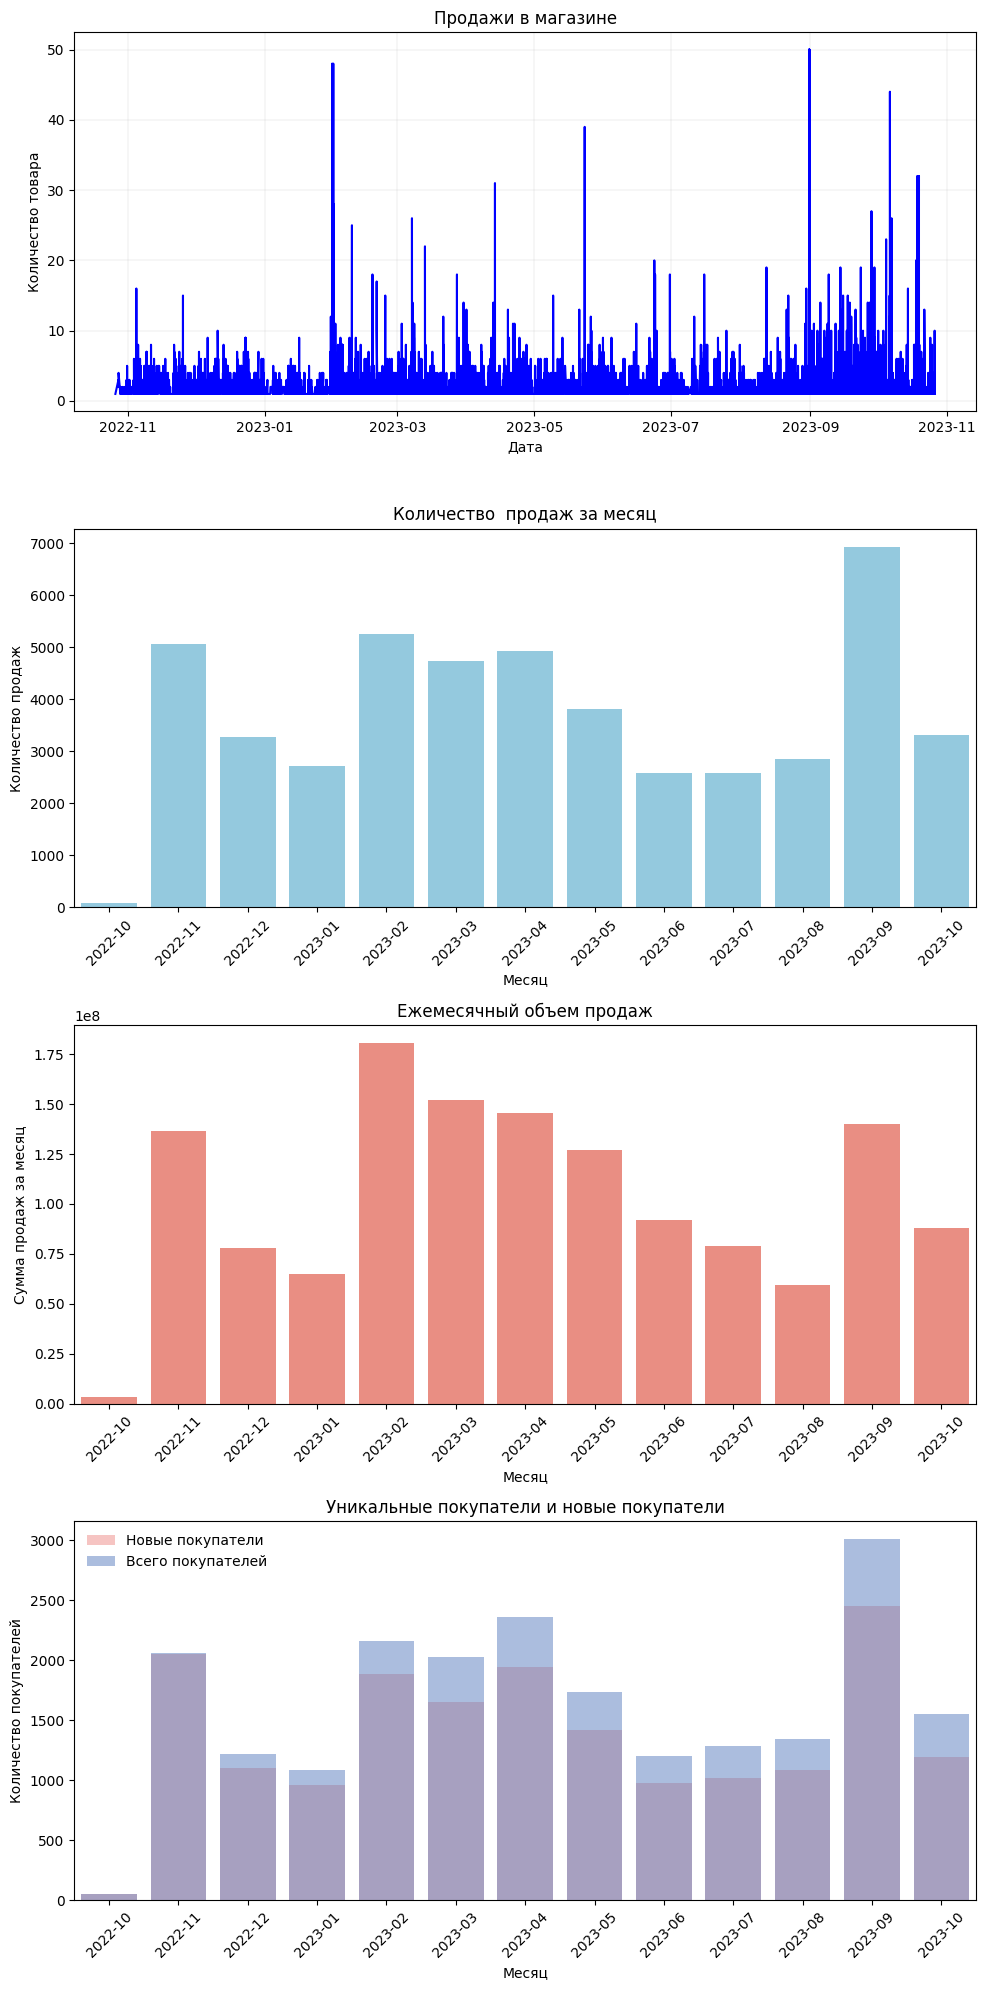

In [21]:
plot_sales_statistics(marketplace_purchases)

Явно наблюдаются всплески в активности покупателей: ноябрь,  февраль, сентябрь. Количество новых покупателей в магазине гораздо больше, чем сделавших повторные покупки.

Это может указывать на необходимость усиления усилий по удержанию клиентов и повышению лояльности среди тех, кто уже совершил покупки. Работа с программами лояльности, персонализированными предложениями или скидками для постоянных клиентов может быть эффективным способом увеличить долю постоянных клиентов в общей клиентской базе. Также стоит дополнительно изучить причины, по которым новые клиенты не становятся постоянными, чтобы оптимизировать маркетинговые стратегии и улучшить клиентский опыт.



**Проанализировать как меняется покупательское поведение в разные дни недели и в выходные.** Это может помочь определить оптимальные дни для проведения маркетинговых акций.

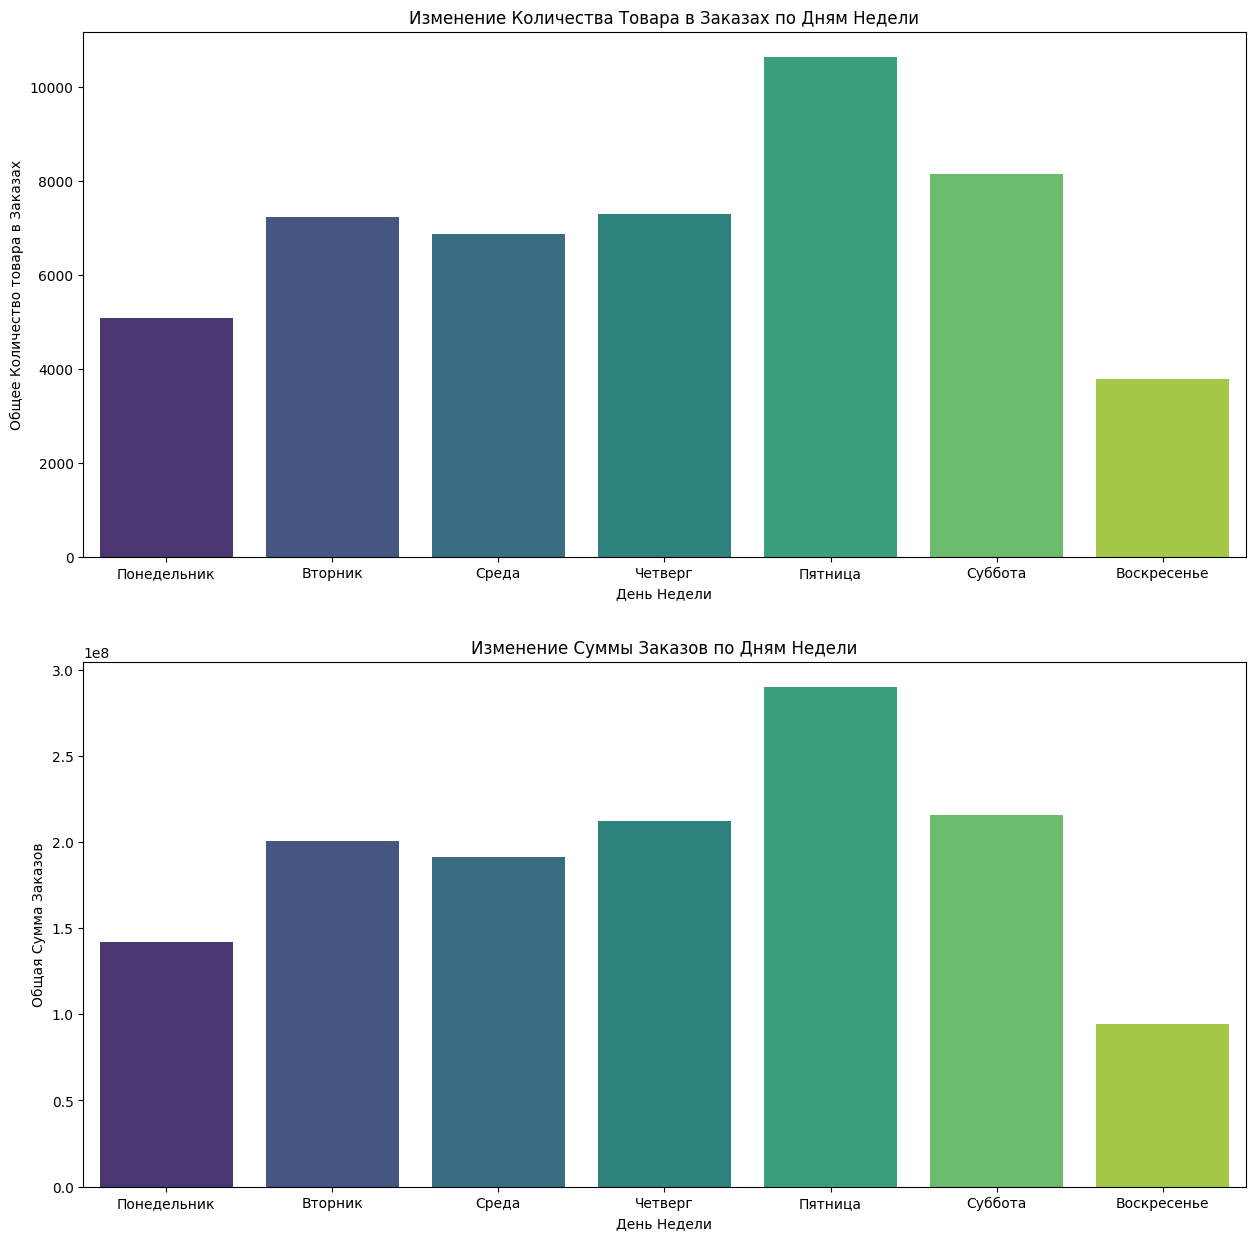

In [23]:
plot_sales_weekdays(marketplace_purchases)

Анализ распределения количества товаров и распределения сумм заказов по дням недели выявил следующие тренды:

- Пятница является лидером по количеству товаров в заказах.
- Суббота и четверг демонстрируют схожие показатели.
- Вторник и среда имеют более умеренные значения.
- Понедельник имеет более умеренное значение.
- Воскресенье демонстрирует наименьшее количество товаров в заказах.

Эти данные могут подсказывать о паттернах в покупательском поведении, что может быть полезно для определения оптимальных дней для проведения маркетинговых акций. Например, пятница, с ее высоким показателем, может быть привлекательным днем для акций или специальных предложений, в то время как в понедельник можно сосредоточить усилия на стимулировании покупок.

### Магазин подарков

In [24]:
print(gifts_purchases.shape)
print('Дата первой покупки:', min(gifts_purchases['date']))
print('Дата последней покупки:', max(gifts_purchases['date']))
gifts_purchases.head(5)

(811, 6)
Дата первой покупки: 2022-10-26 00:00:00
Дата последней покупки: 2023-10-24 00:00:00


,client_id,quantity,price,date,message_id,recommended_by
0,1515915625803894158,1,8943.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
1,1515915625803894158,1,46369.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
2,1515915625803894158,1,4666.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
3,1515915625803894158,1,11963.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message
4,1515915625803894158,1,13107.0,2023-10-11,1515915625935652010-16166-6525589bca68f,bulk_message


In [26]:
# количество уникальных клиентов
print('Количество уникальных клиентов:', gifts_purchases['client_id'].nunique())

Количество уникальных клиентов: 326


**Проанализируем как меняется покупательское поведение в зависимости от даты.**

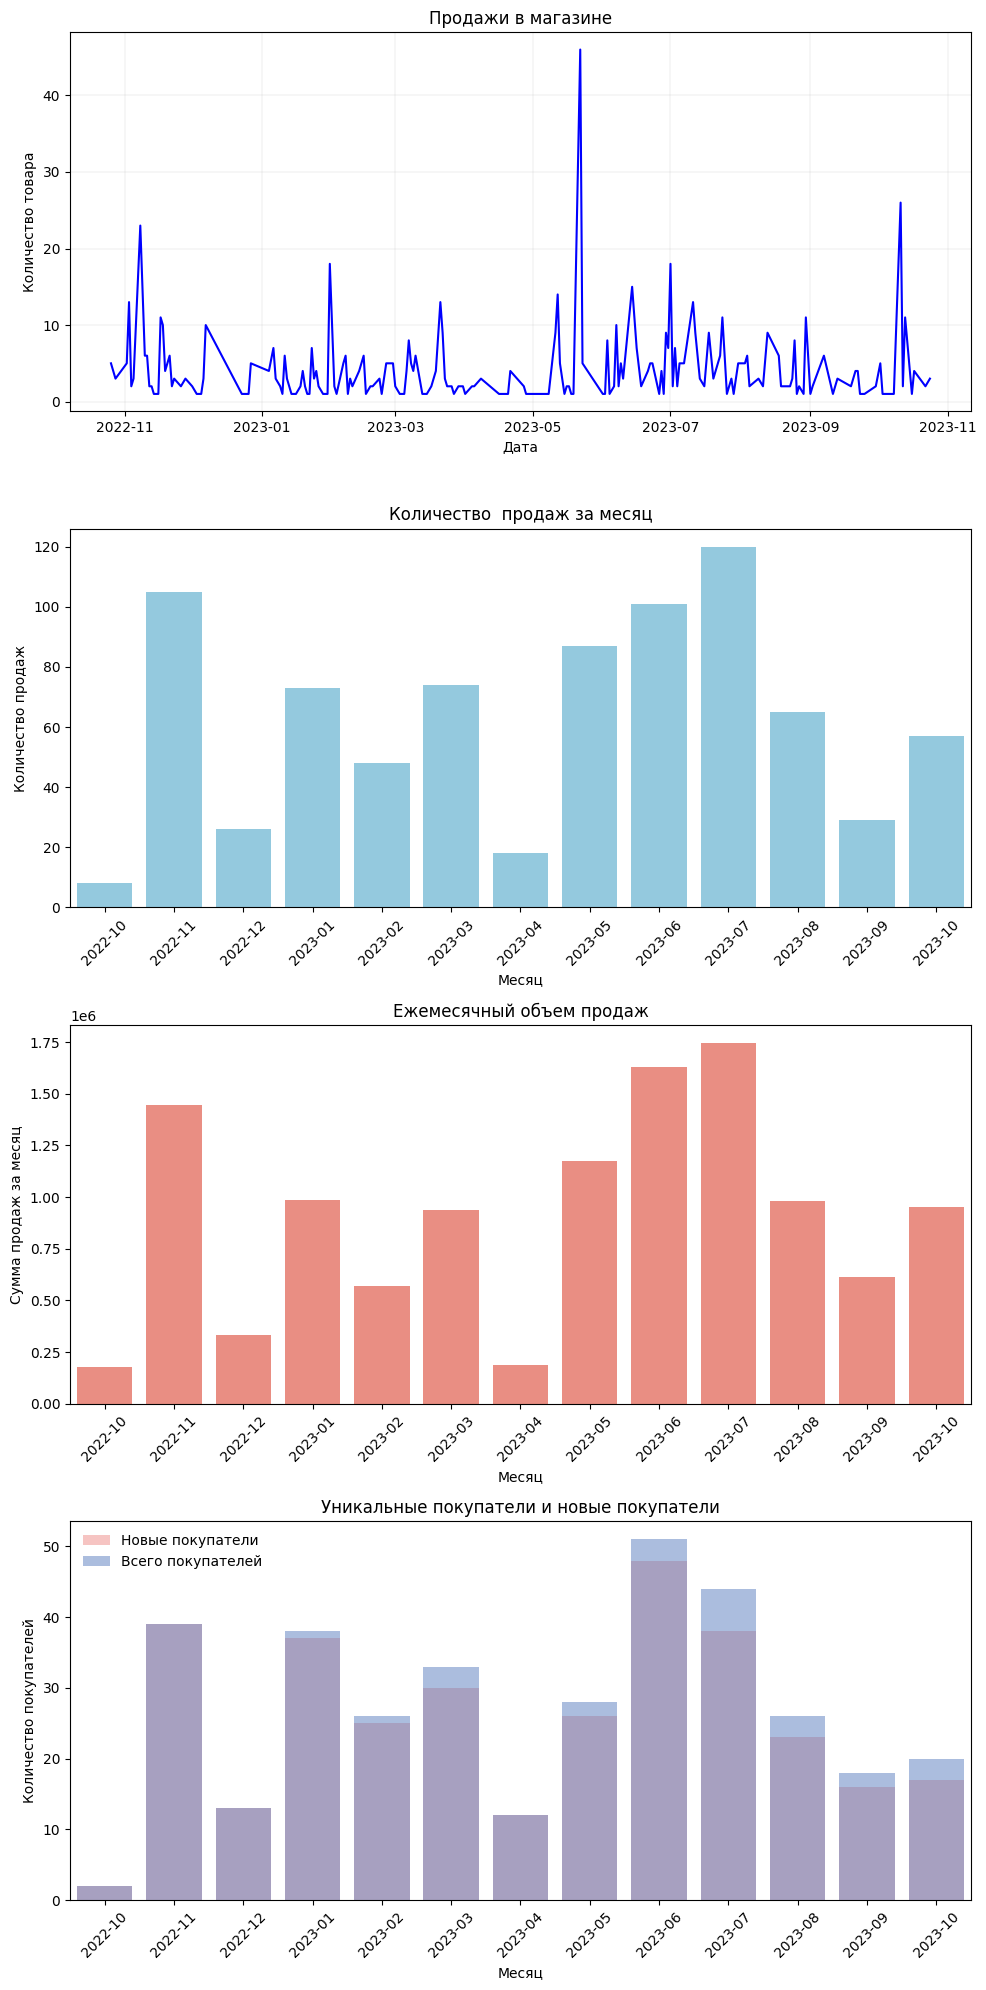

In [27]:
plot_sales_statistics(gifts_purchases)

Явно наблюдаются всплески в активности покупателей: ноябрь, январь, март, июль. Количество новых покупателей в магазине гораздо больше, чем сделавших повторные покупки.

Это может указывать на необходимость усиления усилий по удержанию клиентов и повышению лояльности среди тех, кто уже совершил покупки. Работа с программами лояльности, персонализированными предложениями или скидками для постоянных клиентов может быть эффективным способом увеличить долю постоянных клиентов в общей клиентской базе. Также стоит дополнительно изучить причины, по которым новые клиенты не становятся постоянными, чтобы оптимизировать маркетинговые стратегии и улучшить клиентский опыт.

**Проанализировать как меняется покупательское поведение в разные дни недели и в выходные.**
Это может помочь определить оптимальные дни для проведения маркетинговых акций.

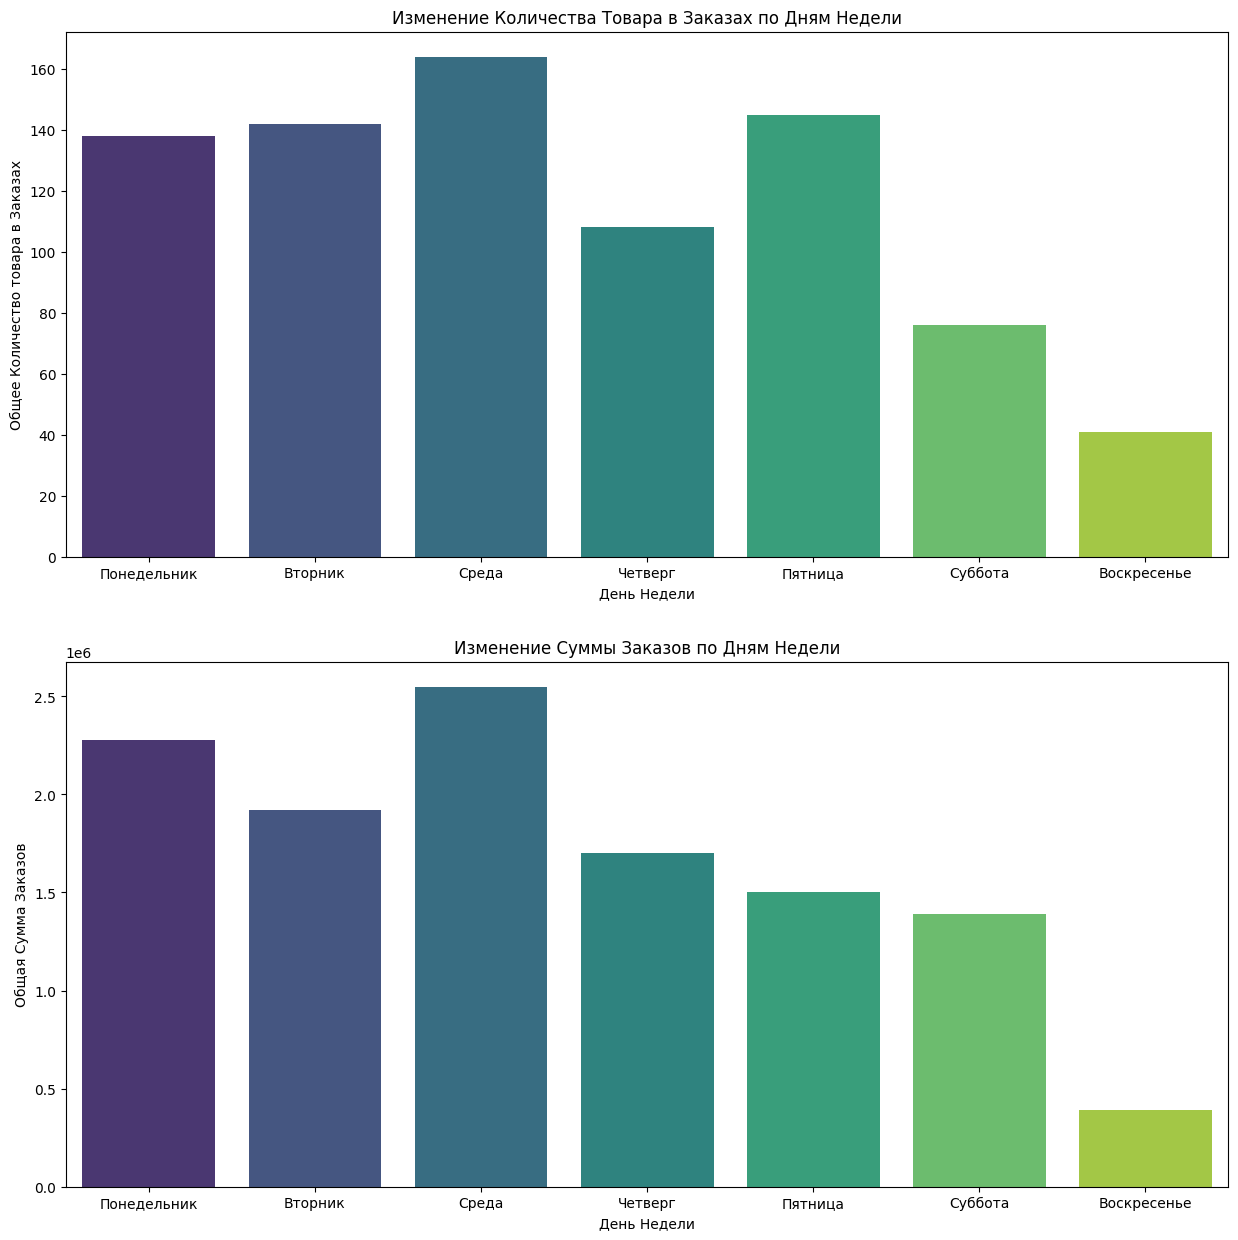

In [29]:
plot_sales_weekdays(gifts_purchases)

Анализ распределения суммы заказов по дням недели немного отличается:

 - Понедельник и среда являются лидером по количеству товаров в заказах.
 - Вторник и четверг демонстрируют схожие показатели.
 - Пятница и суббота демонстрируют схожие показатели. 
 - Воскресенье демонстрирует наименьшее количество товаров в заказах.

Эти данные могут подсказывать о паттернах в покупательском поведении, что может быть полезно для определения оптимальных дней для проведения маркетинговых акций.

### Выводы:

- В данных есть всплески с увеличением количества продаж. 
- Существует тенденция зависимости количества продаж от дня недели.
Эти данные могут подсказывать о паттернах в покупательском поведении, что может быть полезно для определения оптимальных дней для проведения маркетинговых акций. Например, пятница, с ее высоким показателем, может быть привлекательным днем для акций или специальных предложений, в то время как в понедельник можно сосредоточить усилия на стимулировании покупок.
- Важно отметить, что количество новых покупателей во всех магазинах гораздо больше, чем сделавших повторные покупки.
Это может указывать на необходимость проведение дополнительных мер по удержанию клиентов и повышению лояльности среди тех, кто уже совершил покупки. Работа с программами лояльности, персонализированными предложениями или скидками для постоянных клиентов может быть эффективным способом увеличить долю постоянных клиентов в общей клиентской базе. Также стоит дополнительно изучить причины, по которым новые клиенты не становятся постоянными, чтобы оптимизировать маркетинговые стратегии и улучшить клиентский опыт. 
Так исходя из этого модель буду строить используя времнной ряд.

## Подготовка данных.

Объединим данные в один датасет для дальнейшей работы.

In [34]:
# Объединим таблицы и добавим колонку категории магазина.

apparel_purchases['store_category_id'] = 1
marketplace_purchases['store_category_id'] = 2
gifts_purchases['store_category_id'] = 3

# Объединение таблиц
combined_data = pd.concat([apparel_purchases, marketplace_purchases, gifts_purchases], ignore_index=True).copy()

In [36]:
combined_data.head(5)

,client_id,quantity,price,date,message_id,recommended_by,month,day_of_week,store_category_id,created_at
0,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09,4,1,NaT
1,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09,4,1,NaT
2,1515915625468068833,1,3499.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09,4,1,NaT
3,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09,4,1,NaT
4,1515915625468068833,1,2450.0,2023-09-08,1515915625468068833-13781-64fad81bece56,bulk_message,2023-09,4,1,NaT


In [37]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182097 entries, 0 to 182096
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   client_id          182097 non-null  int64         
 1   quantity           182097 non-null  int64         
 2   price              182097 non-null  float64       
 3   date               182097 non-null  datetime64[ns]
 4   message_id         182097 non-null  object        
 5   recommended_by     133915 non-null  object        
 6   month              182097 non-null  period[M]     
 7   day_of_week        182097 non-null  int64         
 8   store_category_id  182097 non-null  int64         
 9   created_at         48182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2), period[M](1)
memory usage: 13.9+ MB
